<a href="https://colab.research.google.com/github/SSrishti-14/srishtisreyaADLab/blob/main/airlineticket_prediction(ADL1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


lab1 Q1-

In [ ]:
train_data = pd.read_excel('Data_Train.xlsx')

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Q2

In [ ]:
null_values = train_data.isnull().sum()

In [ ]:
print(null_values)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Q3

In [ ]:
summary_statistics = train_data.describe()


In [ ]:
print(summary_statistics)

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


Q4

In [ ]:
train_data.dropna(inplace = True)
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


Q5

Q6

<Axes: xlabel='Duration', ylabel='Price'>

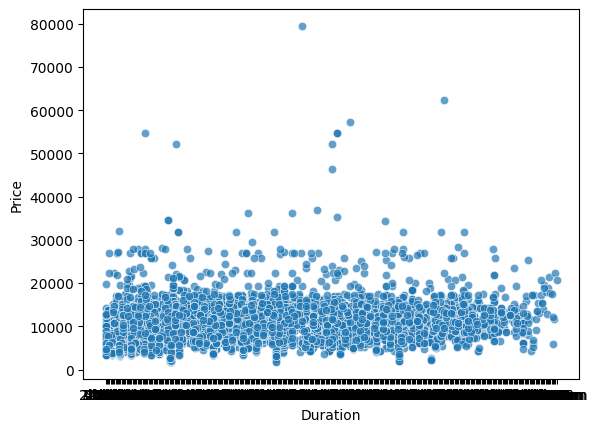

In [ ]:
sns.scatterplot(data=train_data, x='Duration', y='Price', alpha=0.7)

Q7

In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'


    return x

In [ ]:
train_data['Duration'] = train_data['Duration'].apply(preprocess_duration)

In [ ]:
type(train_data['Duration'][0].split(' ')[0][0:-1])

str

In [ ]:
train_data['Duration'][0].split(' ')[0][0:-1]

'2'

In [ ]:
train_data['Duration_Hour'] = train_data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_Hour'],
      dtype='object')

In [ ]:
train_data['Duration_Hour']

,Duration_Hour
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [ ]:

train_data['Duration_Minutes'] = train_data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_Hour', 'Duration_Minutes'],
      dtype='object')

In [ ]:
train_data['Duration_Minutes']

,Duration_Minutes
0,50
1,25
2,0
3,25
4,45
...,...
10678,30
10679,35
10680,0
10681,40


In [ ]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_Hour', 'Duration_Minutes'],
      dtype='object')

In [ ]:
train_data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
train_data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
eval('2*14')

28

In [ ]:
train_data['Duration'].str.replace('h', '*60')

,Duration
0,2*60 50m
1,7*60 25m
2,19*60 0m
3,5*60 25m
4,4*60 45m
...,...
10678,2*60 30m
10679,2*60 35m
10680,3*60 0m
10681,2*60 40m


In [ ]:
train_data['Duration_Total_Minutes'] = train_data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [ ]:
train_data["Duration_Total_Minutes"].head(3)

,Duration_Total_Minutes
0,170
1,445
2,1140


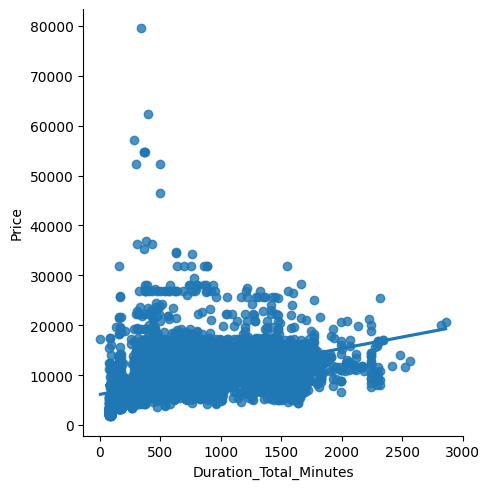

In [ ]:
sns.lmplot(x = 'Duration_Total_Minutes', y = 'Price', data = train_data)

Q8

In [ ]:
def change_into_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

<ipython-input-48-fec71a4c024d>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[col] = pd.to_datetime(train_data[col])
<ipython-input-48-fec71a4c024d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col] = pd.to_datetime(train_data[col])
<ipython-input-48-fec71a4c024d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[col] = pd.to_datetime(train_data[col])


In [ ]:
train_data.dtypes


,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


Q9

In [ ]:
airlines = train_data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines


Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Hour,Duration_Minutes,Duration_Total_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-12-07 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-12-07 05:50:00,2024-12-07 13:15:00,7h 25m,2 stops,No info,7662,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-12-07 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,13882,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-12-07 18:05:00,2024-12-07 23:30:00,5h 25m,1 stop,No info,6218,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-12-07 16:50:00,2024-12-07 21:35:00,4h 45m,1 stop,No info,13302,4,45,285


Q10

<Axes: >

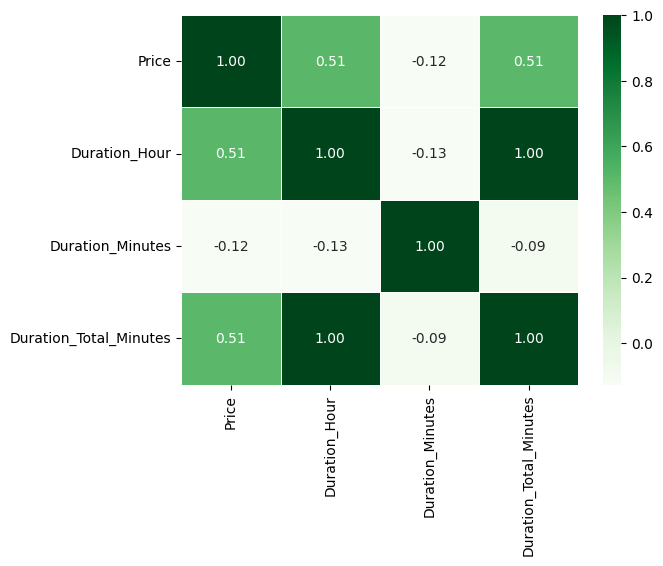

In [ ]:
numerical_data = train_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)